In [12]:
from sklearn.neighbors import KernelDensity
# from scipy.stats import gaussian_kde
# from statsmodels.nonparametric.kde import KDEUnivariate
# from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [16]:
import json

with open('data/men_sprint.json') as file:
    data = json.load(file)

In [31]:
years = []
for i in data.keys():
    for j in data[i]:
        years.append(int(j))
        print(data[i][j])
    break

{'eighth': {'Gap': 0.07400000000000001, 'Heat': 8, 'Nation': 'Ukraine', 'Notes': None, 'Rank': 2}, 'qualifying': {'Behind': 0.225, 'Nation': 'Ukraine', 'Notes': 'q', 'Rank': 8, 'Time': 9.87}, 'sixteenth': {'Gap': None, 'Heat': 4, 'Nation': 'Ukraine', 'Notes': 'Q', 'Rank': 1}}
{'qualifying': {'Behind': 0.429, 'Nation': 'Ukraine', 'Notes': None, 'Rank': 29, 'Time': 10.103}}


In [2]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

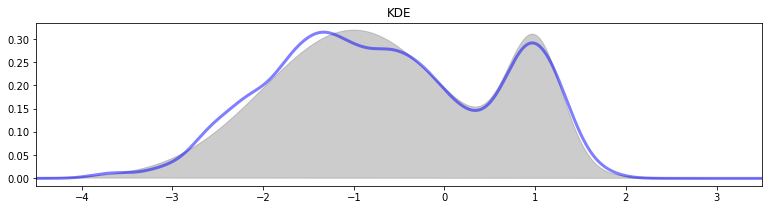

In [14]:
from scipy.stats.distributions import norm

# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

# Plot the three kernel density estimates
fig, ax = plt.subplots(sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)

pdf = kde_sklearn(x, x_grid, bandwidth=0.2)
ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
ax.fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
ax.set_title('KDE')
ax.set_xlim(-4.5, 3.5)
    
from IPython.display import HTML
HTML("<font color='#666666'>Gray = True underlying distribution</font><br>"
     "<font color='6666ff'>Blue = KDE model distribution (500 pts)</font>")

[-4.50000000e+00 -4.49199199e+00 -4.48398398e+00 -4.47597598e+00
 -4.46796797e+00 -4.45995996e+00 -4.45195195e+00 -4.44394394e+00
 -4.43593594e+00 -4.42792793e+00 -4.41991992e+00 -4.41191191e+00
 -4.40390390e+00 -4.39589590e+00 -4.38788789e+00 -4.37987988e+00
 -4.37187187e+00 -4.36386386e+00 -4.35585586e+00 -4.34784785e+00
 -4.33983984e+00 -4.33183183e+00 -4.32382382e+00 -4.31581582e+00
 -4.30780781e+00 -4.29979980e+00 -4.29179179e+00 -4.28378378e+00
 -4.27577578e+00 -4.26776777e+00 -4.25975976e+00 -4.25175175e+00
 -4.24374374e+00 -4.23573574e+00 -4.22772773e+00 -4.21971972e+00
 -4.21171171e+00 -4.20370370e+00 -4.19569570e+00 -4.18768769e+00
 -4.17967968e+00 -4.17167167e+00 -4.16366366e+00 -4.15565566e+00
 -4.14764765e+00 -4.13963964e+00 -4.13163163e+00 -4.12362362e+00
 -4.11561562e+00 -4.10760761e+00 -4.09959960e+00 -4.09159159e+00
 -4.08358358e+00 -4.07557558e+00 -4.06756757e+00 -4.05955956e+00
 -4.05155155e+00 -4.04354354e+00 -4.03553554e+00 -4.02752753e+00
 -4.01951952e+00 -4.01151

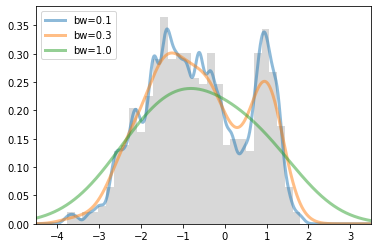

In [5]:
fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(-4.5, 3.5)
ax.legend(loc='upper left')


In [6]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.19310344827586207}


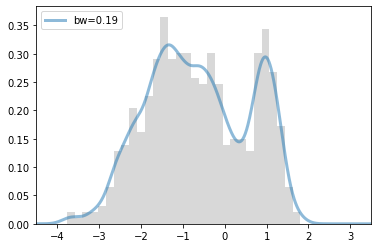

In [7]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(-4.5, 3.5);